<a href="https://colab.research.google.com/github/ramory-l/DataScience-misis/blob/main/14g_practicum19_09_second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Трейдер

Для успешного выполнения этого задания вам предлагается “залезть в шкуру” трейдера. Имеются исторические данные по курсам валют (подсказка: ищите нужные данные в Example 2)  от ЦБ России. Пусть ваша команда выберет 5 валют (выберите любые валюты, которые вам интересны) и найдите ответы на следующие вопросы:


*   для каждых последовательных 7 дней (например: 01.01.2000-07.01.2000, 02.01.2000-08.01.2000 и т. п.) найдите самую выгодную валюту - ту, относительно которой все остальные падали
*   для каждого 30-дневного промежутка определите, на сколько процентов вы могли бы увеличить свой капитал за 30 дней, если бы знали курсы валют наперёд - считайте, что вечером вы можете перекладывать все ваши средства в одну или несколько валют, найдите самый выгодный такой период
*   найдите наиболее и наименее коррелированные (по отношению друг к другу) валюты в каждом календарном году. Для этого посчитайте коэффициенты корреляции по данным за все 365/366 дней каждого года. Попробуйте выдвинуть гипотезы, почему случались те или иные взлёты/падения, в зависимости от политических и исторических событий.







In [3]:
import urllib.request
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

## Для каждых последовательных 7 дней (в нашем случае с XX.03.2002 до XX.03.2002) найдем самую выгодную валюту - ту, отностительно которой все падали

In [4]:
# Сбор данных

def get_currency_data(ex, to):
  if ex >= to or ex < 0 or to < 0:
    return
  currency_data = {}
  prev_date = ''
  for i in range(ex, to + 1):
    if len(str(i)) > 1:
      request_date = f'{i}/03/2002'
    else:
      request_date = f'0{i}/03/2002'
    response = urllib.request.urlopen("http://www.cbr.ru/scripts/XML_daily.asp?date_req={}".format(request_date))
    data = response.read()
    valcurs = ET.fromstring(data)
    if valcurs.text != None:
      continue
    date = valcurs.attrib['Date']
    if prev_date == '':
      prev_date = date
    elif prev_date == date:
      continue
    else:
      prev_date = date
    for item in valcurs:
      charcode = item.find("CharCode").text
      if currency_data.get(charcode, 0) == 0:
        currency_data[charcode] = []
      value = item.find("Value").text
      currency_data[charcode].append(float(value.replace(',', '.')))
  return currency_data

In [ ]:
get_currency_data(1, 7)

{'AUD': [15.9931, 16.0102, 16.1111, 16.1463, 16.1296],
 'BYR': [18.4092, 18.429, 18.3902, 18.3988, 18.4037],
 'CAD': [19.2403, 19.324, 19.4496, 19.4924, 19.5291],
 'CHF': [18.1203, 18.1861, 18.1299, 18.231, 18.274],
 'DKK': [36.0011, 36.101, 36.0867, 36.253, 36.3283],
 'EUR': [26.7634, 26.8343, 26.823, 26.9466, 27.0025],
 'GBP': [43.9106, 43.8254, 44.0252, 44.0908, 44.1146],
 'ISK': [30.6827, 30.7958, 30.9578, 30.8153, 30.6513],
 'JPY': [23.1123, 23.1527, 23.3378, 23.3911, 23.4594],
 'KZT': [20.3369, 20.3393, 20.353, 20.3625, 20.372],
 'NOK': [34.7052, 34.7853, 34.843, 35.0259, 35.115],
 'SEK': [29.4572, 29.5924, 29.5164, 29.7932, 29.9329],
 'SGD': [16.875, 16.8878, 16.9371, 16.9395, 16.9583],
 'TRL': [21.9747, 22.2616, 22.3467, 22.3761, 22.3304],
 'UAH': [58.1171, 58.109, 58.1889, 58.1825, 58.1862],
 'USD': [30.9404, 30.9436, 30.9949, 30.9909, 30.9946],
 'XDR': [38.3921, 38.4205, 38.5527, 38.527, 38.6004]}

In [5]:
def currency_dynamics_in_range(ex, to):
  """
  Динамика валют в таблице
  """
  currency_data = get_currency_data(ex, to)
  dynamics_data = {}
  for currency in currency_data:
    dynamics_data[currency] = []
    prev_value = currency_data[currency][0]
    dynamics_data[currency].append(0)
    i = 1
    count = 0
    while i < len(currency_data[currency]):
      if currency_data[currency][i] < prev_value:
        count -= 1
      elif currency_data[currency][i] > prev_value:
        count += 1
      dynamics_data[currency].append(count)
      prev_value = currency_data[currency][i]
      i += 1
  return pd.DataFrame.from_dict(dynamics_data, orient='index')

In [ ]:
currency_dynamics_in_range(1, 31)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
AUD,0,1,2,3,2,3,2,3,2,1,2,3,4,5,6,7,6,5,4,5,6
GBP,0,-1,0,1,2,3,4,3,2,3,4,5,6,5,6,5,6,5,4,3,4
BYR,0,1,0,1,2,3,2,1,0,-1,0,-1,-2,-3,-2,-3,-4,-3,-4,-3,-4
DKK,0,1,0,1,2,3,2,3,2,3,4,3,4,3,4,3,2,1,0,-1,0
USD,0,1,2,1,2,2,3,2,3,2,3,4,5,6,5,4,5,4,3,2,3
EUR,0,1,0,1,2,3,2,3,2,3,4,3,4,3,4,3,2,3,2,1,2
ISK,0,1,2,1,0,-1,0,1,0,1,2,1,0,-1,0,1,0,1,0,-1,0
KZT,0,1,2,3,4,3,4,5,6,5,6,7,6,7,6,5,6,5,4,3,4
CAD,0,1,2,3,4,5,4,5,4,3,4,5,6,7,8,9,10,9,10,9,10
NOK,0,1,2,3,4,5,6,5,4,3,4,3,4,3,4,3,2,1,0,-1,-2


In [41]:
# Не совсем удачная попытка отобразить динамику валют на графике
def currency_dynamics_in_range_demo(ex, to):
  """
  Динамика валют на графике
  """
  currency_data = get_currency_data(ex, to)
  dynamics_data = {}
  for currency in currency_data:
    dynamics_data[currency] = []
    prev_value = currency_data[currency][0]
    dynamics_data[currency].append(0)
    i = 1
    count = 0
    while i < len(currency_data[currency]):
      if currency_data[currency][i] < prev_value:
        count -= 1
      elif currency_data[currency][i] > prev_value:
        count += 1
      dynamics_data[currency].append(count)
      prev_value = currency_data[currency][i]
      i += 1
  for currency in dynamics_data:
    plt.plot(dynamics_data[currency], label=currency)
  plt.xlabel('value')
  plt.ylabel('time')
  plt.legend()
  plt.show()

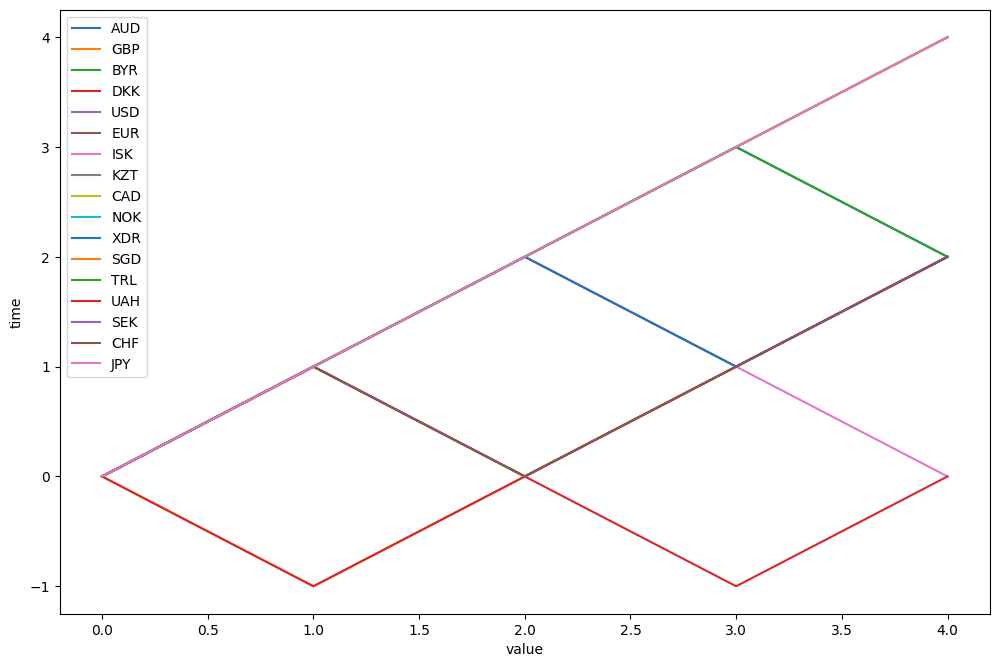

In [44]:
currency_dynamics_in_range_demo(1, 7)

## Для каждого 30-дневного промежутка определите, на сколько процентов вы могли бы увеличить свой капитал за 30 дней, если бы знали курсы валют наперёд - считайте, что вечером вы можете перекладывать все ваши средства в одну или несколько валют, найдите самый выгодный такой период

In [7]:
def find_best_currency_road(currency_dynamics_table):
  """
  Поиск выгодного маршрута
  """
  result = []
  i = 0
  while i < len(currency_dynamics_table.columns):
    column = currency_dynamics_table[i]
    result.append(column.idxmax())
    i += 1
  return result

In [6]:
currency_dynamics_table = currency_dynamics_in_range(1, 31)

In [77]:
find_best_currency_road(currency_dynamics_table)

['AUD',
 'AUD',
 'AUD',
 'AUD',
 'KZT',
 'CAD',
 'NOK',
 'SGD',
 'KZT',
 'JPY',
 'KZT',
 'KZT',
 'GBP',
 'KZT',
 'CAD',
 'CAD',
 'CAD',
 'CAD',
 'CAD',
 'CAD',
 'CAD']

In [8]:
best_currency_road = find_best_currency_road(currency_dynamics_table)

In [55]:
pd.DataFrame.from_dict(get_currency_data(1, 31), orient='index')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
AUD,15.9931,16.0102,16.1111,16.1463,16.1296,16.1885,16.1870,16.2011,16.1563,16.1323,16.2874,16.2964,16.3094,16.4286,16.4976,16.5261,16.5131,16.4706,16.4286,16.5254,16.5865
GBP,43.9106,43.8254,44.0252,44.0908,44.1146,44.1611,44.1657,44.0663,43.9225,43.9327,44.1923,44.2349,44.3777,44.3358,44.4689,44.4223,44.4307,44.4301,44.3851,44.2852,44.3915
BYR,18.4092,18.4290,18.3902,18.3988,18.4037,18.4211,18.4198,18.4038,18.3968,18.3491,18.3564,18.3281,18.2240,18.1753,18.1820,18.1662,18.1315,18.1452,18.1374,18.1422,18.1284
DKK,36.0011,36.1010,36.0867,36.2530,36.3283,36.5796,36.5535,36.5777,36.5598,36.6364,36.9317,36.8036,36.9193,36.8367,37.0620,36.9076,36.7195,36.7183,36.6702,36.5126,36.5185
USD,30.9404,30.9436,30.9949,30.9909,30.9946,30.9946,31.0632,31.0545,31.0758,31.0237,31.0710,31.1119,31.1248,31.1325,31.1276,31.1168,31.1510,31.1353,31.1147,31.0686,31.1192
EUR,26.7634,26.8343,26.8230,26.9466,27.0025,27.1978,27.1834,27.1975,27.1727,27.2326,27.4543,27.3598,27.4458,27.3966,27.5697,27.4450,27.3101,27.3181,27.2658,27.1477,27.1515
ISK,30.6827,30.7958,30.9578,30.8153,30.6513,30.5878,30.9240,30.9678,30.7559,30.8172,31.0121,30.9972,30.9515,30.8609,30.9666,31.0795,31.0516,31.1571,31.1334,31.0779,31.1348
KZT,20.3369,20.3393,20.3530,20.3625,20.3720,20.3665,20.3986,20.4103,20.4277,20.3875,20.4217,20.4432,20.4413,20.4575,20.4498,20.4361,20.4612,20.4515,20.4166,20.3805,20.4241
CAD,19.2403,19.3240,19.4496,19.4924,19.5291,19.6007,19.5809,19.6150,19.5753,19.4360,19.5084,19.6252,19.6297,19.6655,19.7110,19.7229,19.7308,19.5610,19.5764,19.5044,19.5337
NOK,34.7052,34.7853,34.8430,35.0259,35.1150,35.2400,35.2674,35.2020,35.1477,35.0550,35.4138,35.2104,35.4420,35.4181,35.6743,35.6305,35.4928,35.3645,35.3636,35.2400,35.2282


In [9]:
currency_table = pd.DataFrame.from_dict(get_currency_data(1, 31), orient='index')

In [59]:
def find_percentage_with_best_currency_road(currency_table, best_currency_road, value):
  """
  Находим заработанные проценты по лучшему маршруту
  """
  previus_currency = best_currency_road[0]
  temp_value = value
  start_value = temp_value / currency_table[0][best_currency_road[0]]
  i = 1
  while i < len(currency_table.columns):
    current_currency = best_currency_road[i]
    if current_currency == previus_currency:
      temp = temp_value / currency_table[i][best_currency_road[i]]
      start_value += abs(start_value - temp)
    else:
      start_value *= currency_table[i - 1][previus_currency]
      temp_value = start_value
      start_value = temp_value / currency_table[i][best_currency_road[i]]
      previus_currency = current_currency
    i += 1
  last_currency = len(currency_table.columns)
  result = start_value * currency_table[last_currency - 1][best_currency_road[-1]]
  percent = (result / value - 1) * 100
  return f'Итоговый капитал: {result} рублей, выигрышный процент: {percent}%'

In [60]:
find_percentage_with_best_currency_road(currency_table, best_currency_road, 100)

'Итоговый капитал: 104.35721997801383 рублей, выигрышный процент: 4.357219978013838%'